In [69]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

---
## Import Data

In [5]:
covid_df = pd.read_csv("/Users/walter/Desktop/REPOS/jupyter-notebooks/data/covid_flu.csv")
covid_df

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.00,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.00,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.00,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.00,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.00,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,COVID19,NaN,1.40,NaN,NaN,9.2,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1478,COVID19,NaN,0.83,NaN,NaN,14.8,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1479,COVID19,NaN,3.00,NaN,NaN,15.0,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1480,COVID19,NaN,4.00,NaN,NaN,6.6,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## Explore the Data

In [11]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

### Get percentage of Nulls for each feature

In [88]:
pd.DataFrame(covid_df.isnull().mean().round(4)*100, columns=['Percent Null'])

,Percent Null
Diagnosis,0.00
InitialPCRDiagnosis,92.98
Age,1.89
Sex,5.13
neutrophil,93.05
serumLevelsOfWhiteBloodCell,89.81
lymphocytes,89.47
CReactiveProteinLevels,90.76
DurationOfIllness,94.13
CTscanResults,89.27


### Get Numerical features & describe

In [14]:
covid_df.describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,26.471040,6.854078,6.885159,1.850154,13.988506,38.068312
std,21.487982,12.690131,4.346668,3.956668,9.043171,1.094468
min,0.000000,0.446000,0.500000,0.130000,1.000000,35.722222
25%,7.000000,2.160000,3.995000,0.637500,7.000000,37.222222
50%,24.000000,3.310000,5.690000,0.905500,12.000000,38.000000
75%,42.000000,6.645000,9.155000,1.605000,20.000000,38.722222
max,88.000000,93.000000,36.070000,30.600000,37.000000,42.222222


In [22]:
nums = covid_df.describe().columns.to_list()
print(nums)

['Age', 'neutrophil', 'serumLevelsOfWhiteBloodCell', 'lymphocytes', 'DurationOfIllness', 'Temperature']


### Get Categorical and describe

In [17]:
covid_df.describe(include=['object', 'int'])

,Diagnosis,InitialPCRDiagnosis,Sex,CReactiveProteinLevels,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue
count,1482,104,1406,137,159,209,93,450,923,859,75,670,421,531
unique,2,2,2,120,2,63,2,2,2,2,2,2,2,2
top,H1N1,Yes,M,8,Yes,asthma,Yes,No,Yes,Yes,Yes,Yes,No,Yes
freq,1072,100,748,3,144,36,90,340,777,745,45,407,319,348


In [24]:
cats = covid_df.describe(include=['object', 'int']).columns.to_list()
print(cats)

['Diagnosis', 'InitialPCRDiagnosis', 'Sex', 'CReactiveProteinLevels', 'CTscanResults', 'RiskFactors', 'GroundGlassOpacity', 'Diarrhea', 'Fever', 'Coughing', 'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Fatigue']


### Get correlation matrix

<Axes: >

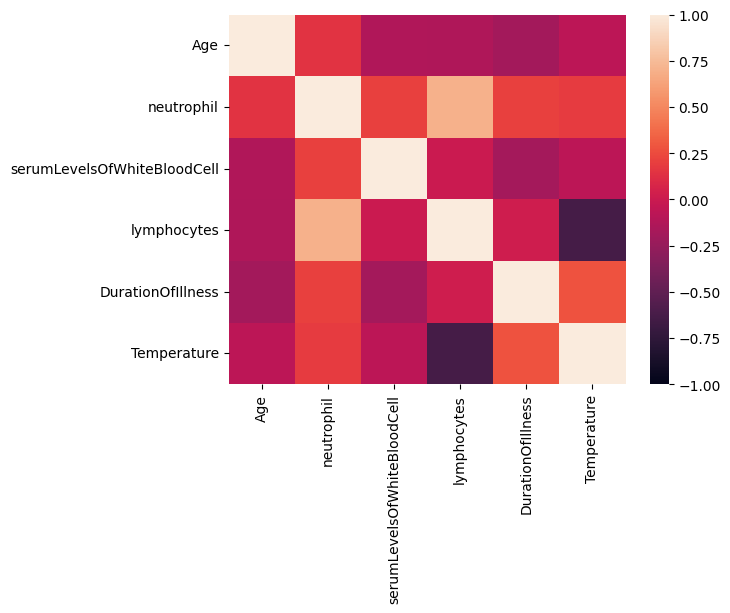

In [40]:
sns.heatmap(covid_df[nums].corr(), vmin=-1)

### Plot Scatter Matrix

<Figure size 1200x1200 with 0 Axes>

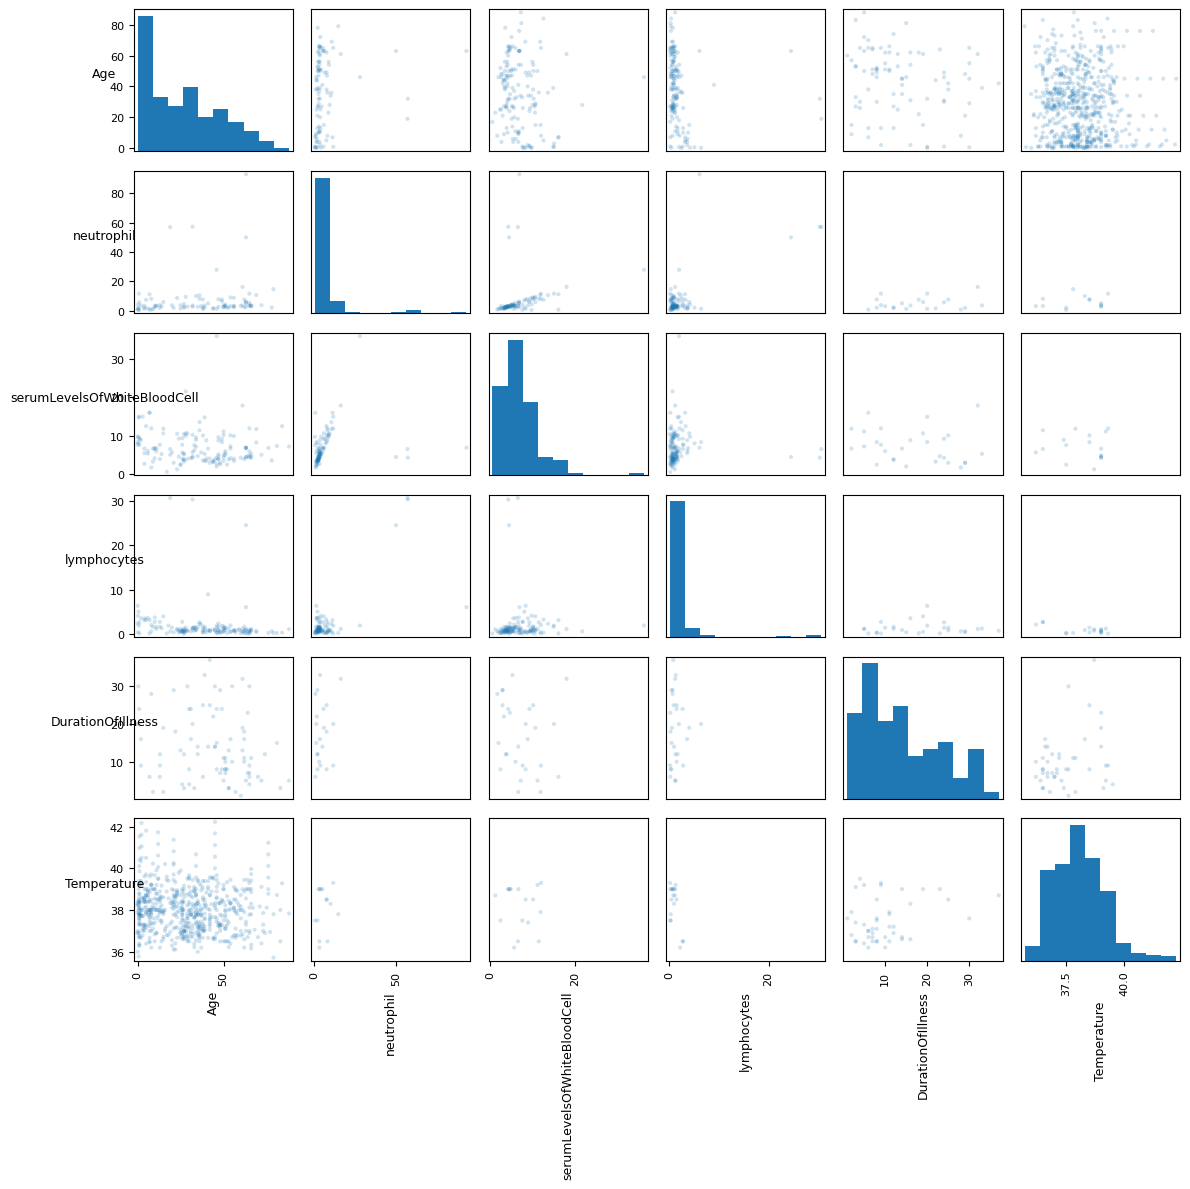

In [48]:
# Increase the figure size
plt.figure(figsize=(12, 12))  # You can adjust this as necessary

# Create the scatter matrix with some customization
scatter_matrix = pd.plotting.scatter_matrix(
    covid_df,
    alpha=0.2,  # Transparency of the points
    figsize=(12, 12),  # Figure size (width, height)
    diagonal='hist',  # Show histograms on the diagonal
    marker='.',  # Point marker style
    density_kwds={'linewidth': 0.5},  # Adjust the density plot line width
)

# Rotate axis labels
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=9, rotation=90)
    ax.set_ylabel(ax.get_ylabel(), fontsize=9, rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [70]:
# sns.histplot(covid_df['Age'], bins=100, kde=True)

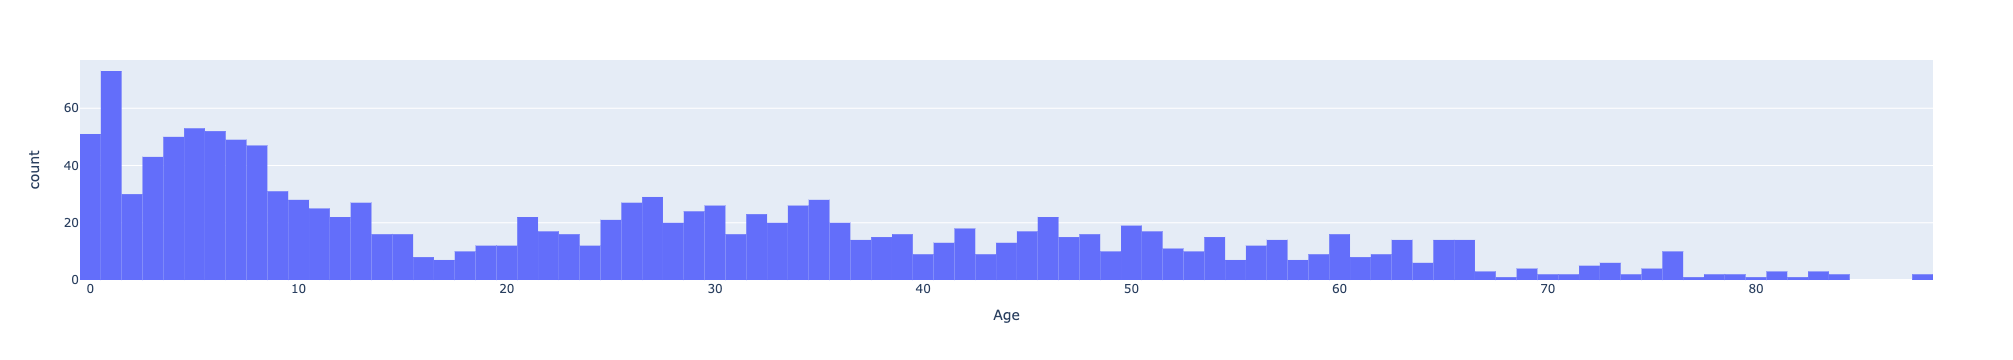

In [75]:
px.histogram(covid_df, x='Age', nbins=100)

### Get a summary of the response variable

In [92]:
covid_df['Diagnosis'].value_counts(normalize=True)

Diagnosis
H1N1       0.723347
COVID19    0.276653
Name: proportion, dtype: float64

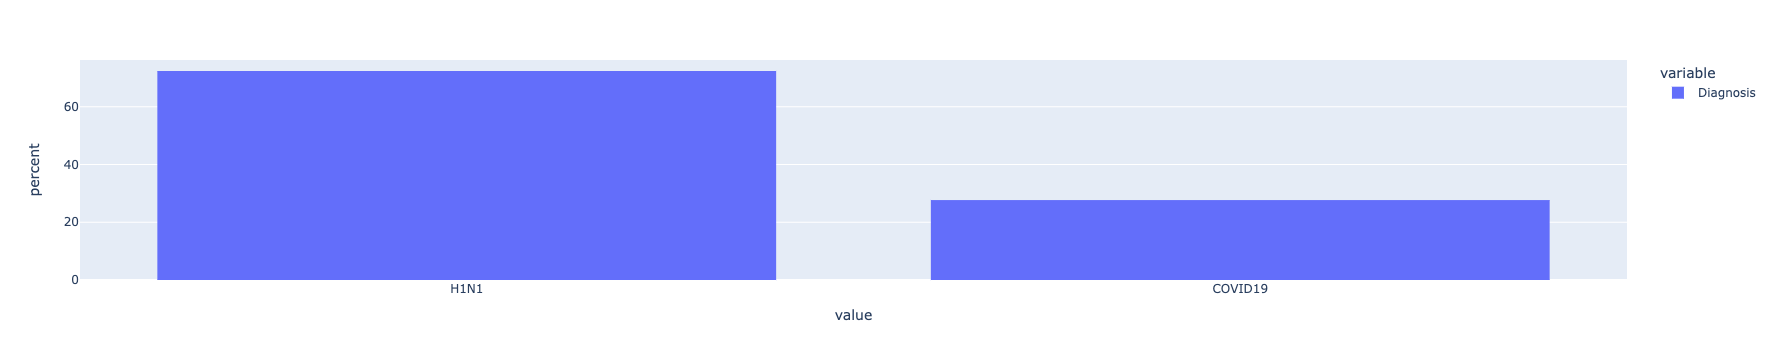

In [96]:
px.histogram(covid_df['Diagnosis'], histnorm='percent')

##### Note: Null Accuracy will be 72%

---
## Clean the Data